# Pertemuan 5
## 1. Contour
    - Find Contour 
    - Draw Contour 
    - Contour Hierarchy 
## 2. Contour Feature
    - Contour Feature 
    - Contour Property
    - Contour Additional Function 

___

### Maximizing Jetson Nano Perfomance

In [ ]:
# sudo nvpmodel -m 0
# sudo jetson_clocks

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


____
____
# 1. Find Contour 

- Using method `cv2.findContour(img, mode, method)`
- Where :
    - `img` : input image
    - `mode` :
        - `cv2.CHAIN_APPROX_NONE` : all the boundary points are stored
        - `cv2.CHAIN_APPROX_SIMPLE` : only end points / corner of that shape are stored <br>
        <img src="res/mode_find_contour.png" style="width:300px; margin-top:10px"></img>
        - `with cv2.CHAIN_APPROX_NONE` (734 points) 
        - second image shows the one with `cv2.CHAIN_APPROX_SIMPLE` (only 4 points)
    - `method` : 
        - `cv2.RETR_EXTERNAL`  : retrieves only the **extreme outer contours**.  It sets all contours to `hierarchy[i][2] = hierarchy[i][3] = -1`.
        - `cv2.RETR_LIST`   : retrieves **all of the contours** without establishing any hierarchical relationships. 
        - `cv2.RETR_CCOMP`  : retrieves **all of the contours** and organizes them into a **two-level hierarchy**.  
        - `cv2.RETR_TREE`   : retrieves **all of the contours** and reconstructs a **full hierarchy** of nested contours. 
        
- Output : 
    - `contours` : list of countour location (x,y) : <br>
    <img src="res/hierarchy_moves.gif" style="width:400px; margin-top:10px"></img>
    
    - `hierarchy` : list of `[Next, Previous, First_Child, Parent]`, <br> Representation of this relationship when some shapes are inside other shapes, we call outer one as **parent** and inner one as **child**. 
        - `Next` : next contour at the same hierarchical level.
        - `Previous` : previous contour at the same hierarchical level.
        - `First_Child` : first child contour.
        - `Parent` : index of its parent contour. <br>
        > *If there is no **child** or **parent**, that field is taken as -1*
        - Example :<br>
            <img src="res/hierarchy.png" style="width:600px; margin-top:10px"></img>
            - `Next` & `Previous` :
                - Start from contour-0. Who is next contour in its same level ? It is contour-1. 
                - So simply put Next = 1. Similarly for Contour-1, next is contour-2. So Next = 2. 
                - What about contour-2? There is no next contour in the same level. 
                - So simply, put Next = -1. 
                - What about contour-4? It is in same level with contour-5. 
                - So its next contour is contour-5, so Next = 5.
            - `First_Child` & `Parent` :
                - For contour-2, child is contour-2a. 
                - So it gets the corresponding index value of contour-2a. 
                - What about contour-3a? It has two children. 
                - But we take only first child. And it is contour-4. So First_Child = 4 for contour-3a.

___
## 1.1 Contour Method `cv2.RETR_EXTERNAL`
- retrieves only the **extreme outer contours**. It sets all contours to `hierarchy[i][2] = hierarchy[i][3] = -1`.

In [ ]:
img = cv2.imread('hierarchy.png')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# find contour
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# show Image
plt.figure(figsize=(20,7))
plt.imshow(img[:,:,::-1])

In [ ]:
# hierarchy of contour
# [Next, Previous, First_Child, Parent]
hierarchy

In [ ]:
# if we choose method RETR_EXTERNAL,
# there is no First_Child and Parent on the hierarchy,
# since this method only retrieve extreame outer contour

___
## 1.2 Draw Contour `cv2.drawContour()`

- Using method `cv2.drawContours(img, contour, contour_index, (B,G,R), thickness)`
- where :
    - `img` : input image
    - `contour` : contour location (list)
    - `contour_index` : parameter indicating a contour to draw. If it is negative, all the contours are drawn.
    - `(B,G,R)` : contour color
    - `thickness` : contour thickness

In [ ]:
# draw contours on image
for cnt in contours:
    cv2.drawContours(img, cnt, -1, (0,0,255), 3)

# show Image
plt.figure(figsize=(20,7))
plt.imshow(img[:,:,::-1])

In [ ]:
# on above image , we can see that the contour result from method RETR_EXTERNAL give only extream outer contour

___
## 1.3 Contour Method `cv2.RETR_TREE`
- retrieves **all of the contours** and reconstructs a **full hierarchy** of nested contours. <br>
<img src="res/_tree_hierarchy.png" style="width:600px; margin-top:10px;"></img>

In [ ]:
img = cv2.imread('hierarchy.png')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# find contour with method RETR_TREE
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# print hierachy
# [Next, Previous, First_Child, Parent]
print(hierarchy)

In [ ]:
# with method RETR_TREE, we can get full hierachy level for that image contour
# For example , for contour with idx 4 ([-1 -1  5  3]), the First_Child is 5 and Parent is 3
# remember First_Child is a coutour located inside the current contour
# and Parent is a contour outside the current contour
# since in the contour idx 4 above there is only one contour, so the Next and Previous should be -1 

In [ ]:
# draw contour
for cnt in contours:
    cv2.drawContours(img, cnt, -1, (0,0,255), 3)

# show Image
plt.figure(figsize=(20,7))
plt.imshow(img[:,:,::-1])

## 1.4 Contour Method `cv2.RETR_CCOMP`
- retrieves **all of the contours** and organizes them into a **two-level hierarchy**. 
- ie external **contours of the object (ie its boundary)** are placed in **hierarchy 1**. 
- And the **contours of holes** inside object (if any) is placed in **hierarchy 2**. 
- If any object inside it, its contour is placed again in hierarchy-1 only. 
- And its hole in hierarchy-2 and so on.<br>
<img src="res/ccomp_hierarchy.png" style="width:450px; margin-top:10px;"></img><br><br>
- Other ilustration, <br>
<img src="res/ccomp.png" style="width:450px; margin-top:10px;"></img><br><br>
- In Summary where use RTR_CCOMP method,
    - Boundary contour will be hierarchy 1
    - Hole contour will be hierarchy 2

In [ ]:
img = cv2.imread('hierarchy.png')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# find contour with method RETR CCOMP
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# print hierarchy
# [Next, Previous, First_Child, Parent]
print(hierarchy)

In [ ]:
# with method RETR_CCOMP, all hierarchy is retrieved like RETR_TREE,
# the different is on RETR_CCOMP there is only TWO LEVEL hierarchy
# for example in contoru with idx 4 ([-1 -1 -1  3]) compare to the result of RETR_TREE,
# there is no First_Child on that level
# and the Parent is 3
#
# NEED TO NOTE :
# -- BOUNDARY CONTOUR is LEVEL 1 HIERARCHY in CCOPM , thats means there is no PARENT for that CONTOUR
# -- HOLE CONTOUR is LEVEL 2 HIERARCHY in CCOPM, thats means there is a PARENT for that CONTOUR

In [ ]:
# draw contour
for cnt in contours:
    cv2.drawContours(img, cnt, -1, (0,0,255), 3)

# show Image
plt.figure(figsize=(20,7))
plt.imshow(img[:,:,::-1])

## 1.5 Implementation in Real Image

In [ ]:
# EXAMPLE 1 : find contour of blocks color

img = cv2.imread('blocks.jpg')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image, because text more dark compare to the background, 
# for this purpose we need to user threshold binary inverse
ret, thresh = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)

# find contour using RETR_EXTERNAL method
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# draw contour
for cnt in contours:
    cv2.drawContours(img, cnt, -1, (125,255,0), 2)
    
# show Image
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap="gray")
plt.title("binary image")

plt.subplot(1, 2, 2)
plt.imshow(img[:,:,::-1])
plt.title("draw contour")

In [ ]:
# EXAMPLE 2 : find contour of noisy text

img = cv2.imread('noisy_text.png')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image, because text more dark compare to the background, 
# for this purpose we need to user threshold binary inverse
# apply threshold binary + Otsu's (since the background is more dark compare to the text )
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# find contour using RETR_EXTERNAL method
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# draw contour
for cnt in contours:
    cv2.drawContours(img, cnt, -1, (0,0,255), 4)
    
# show Image
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap="gray")
plt.title("binary image")

plt.subplot(1, 2, 2)
plt.imshow(img[:,:,::-1])
plt.title("draw contour")

In [ ]:
# EXAMPLE 3 : find contour of license plate

img = cv2.imread('license_plate.jpg')
img = cv2.resize(img, (0,0), fx=4, fy=4)

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image
# apply threshold binary + Otsu's (since the background is more dark compare to the text )
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# find contour using RETR_CCOMP method to get two level hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# draw contour
for cnt, h in zip(contours, hierarchy[0]):
    # filter contour when hierarchy with no parent (boundary doesn't have parent).
    # and there shoulde next or prev contour, 
    # text in license plate should be in same hierarchy level as boundary contour
    if (h[0] != -1 or h[1] != -1) and h[3] == -1 :                           
        cv2.drawContours(img, cnt, -1, (0,255,255), 4)
    
# show Image
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap="gray")
plt.title("binary image")

plt.subplot(1, 2, 2)
plt.imshow(img[:,:,::-1])
plt.title("draw contour")

In [ ]:
# NOTE
# on above implementation, we are able to find a countour boundary for license plate image (text white , background black)
# but unnecassary contour still included into the result
# we need to apply a filtering to find text like contour for above example
# we can explore that possibility in section CONTOUR FEATURE

In [ ]:
# EXAMPLE 4 : find contour of photo in KTP

img = cv2.imread('ktp2.jpg')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image
# apply threshold binary inv + Otsu's (since the background is more bright compare to the photo area )
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# find contour using RETR_CCOMP method to get two level hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# draw contour
for cnt, h in zip(contours, hierarchy[0]):
    # filter contour when hierarchy with no parent (boundary doesn't have parent).
    # and there shoulde next or prev contour, 
    # text in license plate should be in same hierarchy level as boundary contour
    if (h[0] != -1 or h[1] != -1) and h[3] == -1 :                           
        cv2.drawContours(img, cnt, -1, (0,255,255), 2)
    
# show Image
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap="gray")
plt.title("binary image")

plt.subplot(1, 2, 2)
plt.imshow(img[:,:,::-1])
plt.title("draw contour")

In [ ]:
# NOTE
# on above implementation, we are able to find a countour boundary for KTP image
# but unnecassary contour still included into the result
# we need to apply a filtering to find text like contour for above example
# we can explore that possibility in section CONTOUR FEATURE

____
____
# 2. Contour Feature 
## 2.1 Contour Feature
- **Contour Area (luasan)** <br>
    `area = cv2.contourArea(cnt)`<br><br>
- **Contour Perimeter (keliling)** <br>
    `perimeter = cv2.arcLength(cnt,True)`<br><br>
- **Contour Approximation** <br>
    It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.<br> 
    `epsilon = 0.1*cv2.arcLength(cnt,True)` <br>
    `approx = cv2.approxPolyDP(cnt,epsilon,True)` <br>
    Below, in second image, green line shows the approximated curve for epsilon = 10% of arc length. <br>
    Third image shows the same for epsilon = 1% of the arc length. <br>
    <img src="res/approx.jpg" style="width:400px; margin-top:10px;"></img><br><br>
- **Convex Hull** <br>
    Convex Hull checks a curve for convexity defects and corrects it. <br>
    `hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]` <br>
    `points` are the contours we pass into. <br>
    `hull` is the output, normally we avoid it. <br>
    `clockwise` : Orientation flag. If it is True, the output convex hull is oriented clockwise. Otherwise, it is oriented counter-clockwise. <br>
    `returnPoints` : By default, True. Then it returns the coordinates of the hull points. If False, it returns the indices of contour points corresponding to the hull points. <br>
    But if you want to find convexity defects, you need to pass `returnPoints = False`.<br>
    <img src="res/convexitydefects.jpg" style="width:200px; margin-top:10px;"></img><br><br>
- **Bounding Rectangle** <br>
    <img src="res/boundingrect.png" style="width:200px; margin-top:10px;"></img>
    - **Straight Bounding Rectangle** <br>
        it doesn't consider the rotation of the object. So area of the bounding rectangle won't be minimum. <br>
        `rect = cv2.boundingRect(cc)`<br>
        where `rect` is list contain `x,y,w,h` point of rectangle.
    - **Rotated Rectangle** <br>
        drawn with minimum area, so it considers the rotation also.<br>
        `rect = cv2.minAreaRect(cnt)`<br>
        where `rect` is center `(x,y), (width, height), angle` of rotation<br><br>
- **Minimum Enclosing Circle** <br>
    `(x,y),radius = cv2.minEnclosingCircle(cnt)` <br>
    `center = (int(x),int(y))` <br>
    `radius = int(radius)` <br>
    <img src="res/circumcircle.png" style="width:200px; margin-top:10px;"></img><br><br>
- **Fitting an Ellipse** <br>
    `ellipse = cv2.fitEllipse(cnt)` <br>
    `cv2.ellipse(img,ellipse,(0,255,0),2)` <br>
    <img src="res/fitellipse.png" style="width:200px; margin-top:10px;"></img><br><br>
- **Fitting a Line** <br>
    `rows,cols = img.shape[:2]` <br>
    `[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)` <br>
    `lefty = int((-x*vy/vx) + y)` <br>
    `righty = int(((cols-x)*vy/vx)+y)` <br>
    <img src="res/fitline.jpg" style="width:200px; margin-top:10px;"></img>

In [ ]:
# EXAMPLE 5 : LICENSE PLATE | find contour AREA & contour RECT of license plate

img = cv2.imread('license_plate.jpg')
img = cv2.resize(img, (0,0), fx=4, fy=4)
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image
# apply threshold binary + Otsu's (since the background is more dark compare to the text )
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# find contour using RETR_CCOMP method to get two level hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# draw contour
for cnt, h in zip(contours, hierarchy[0]):
    # filter contour when hierarchy with no parent (boundary doesn't have parent).
    # and there shoulde next or prev contour, 
    # text in license plate should be in same hierarchy level as boundary contour
    if (h[0] != -1 or h[1] != -1) and h[3] == -1 :                           
        cv2.drawContours(img, cnt, -1, (0,255,255), 2)

        # find contour Area & boungin Rect
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)
        text = "area : %d" % area
        cv2.putText(img, text, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2)
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 0, 255), 2)
    
# show Image
plt.figure(figsize=(20,7))
plt.imshow(img[:,:,::-1])
plt.title("draw contour")

___
## 2.2 Contour Property
- **Aspect Ratio**
    - It is the ratio of width to height of bounding rect of the object.
    ```
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = w/h
    ``` 
<br><br>
- **Extent**
    - Extent is the ratio of contour area to bounding rectangle area.
    ```
    area = cv2.contourArea(cnt)
    x,y,w,h = cv2.boundingRect(cnt)
    rect_area = w*h
    extent = area/rect_area
    ```
<br><br>
- **Solidity**
    - Solidity is the ratio of contour area to its convex hull area.
    ```
    area = cv2.contourArea(cnt)
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = area/hull_area
    ```
<br><br>
- **Contour Mask**
    - Create mask image (binary image) from detected contour
    ```
    mask = np.zeros(binary_img.shape, np.uint8)
    cv.drawContours(mask, [cnt], 0, 255, -1)
    ```
<br><br>
- **Extreme Points**
    ```
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
    ```
    ![](res/extremepoints.jpg)


In [ ]:
# EXAMPLE 6 : LICENSE PLATE | find contour filter by aspect ratio & extent

img = cv2.imread('license_plate.jpg')
img = cv2.resize(img, (0,0), fx=4, fy=4) # resize to arger image, since the license_plate.jpg to small
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image
# apply threshold binary + Otsu's (since the background is more dark compare to the text )
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# find contour using RETR_CCOMP method to get two level hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# draw contour
for cnt, h in zip(contours, hierarchy[0]):
    # filter contour when hierarchy with no parent (boundary doesn't have parent).
    # and there shoulde next or prev contour, 
    # text in license plate should be in same hierarchy level as boundary contour
    if (h[0] != -1 or h[1] != -1) and h[3] == -1 :                           
        # find contour Area & boungin Rect
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)

        # calculate aspectRatio & extent
        aspectRatio = float(w)/h 
        rect_area = w*h
        extent = float(area)/rect_area
        
        # filter contour with aspect ratio less than 1 and more than 0.1 
        # and extent greater than 0.1 (rejecting long contour with small filled area)
        # area more than 100 pixel (rejecting small contour)
        if aspectRatio < 1 and aspectRatio > 0.1 and extent > 0.1 and area > 100:
            cv2.drawContours(img, cnt, -1, (0,255,255), 2)
    
# show Image
plt.figure(figsize=(20,7))
plt.imshow(img[:,:,::-1])
plt.title("draw contour")

In [ ]:
# EXAMPLE 7 : KTP |  find contour filter by aspect ratio & extent

img = cv2.imread('ktp1.jpg')
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image
# apply threshold binary + Otsu's (since the background is more bright compare to the photo area )
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# find contour using RETR_CCOMP method to get two level hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# draw contour
for cnt, h in zip(contours, hierarchy[0]):
    # filter contour when hierarchy with no parent (boundary doesn't have parent).
    # and there shoulde next or prev contour, 
    # text in license plate should be in same hierarchy level as boundary contour
    if (h[0] != -1 or h[1] != -1) and h[3] == -1 :                           
        # find contour Area & boungin Rect
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)

        # calculate aspectRatio & extent
        aspectRatio = float(w)/h 
        rect_area = w*h
        extent = float(area)/rect_area
        
        # filter contour with aspect ratio less than 1 and more than 0.1 
        # and extent greater than 0.4 (rejecting long contour with small filled area)
        # area more than 200 pixel (rejecting small contour)
        if aspectRatio < 1 and aspectRatio > 0.3 and extent > 0.4 and area > 200:
            cv2.drawContours(img, cnt, -1, (0,255,255), 2)
    
# show Image
plt.figure(figsize=(20,7))
plt.imshow(img[:,:,::-1])
plt.title("draw contour")

___
## 2.3 Contour Filter & Crop / Draw Bouning Box
- In this part we will try to apply contour feature and crop each filtered contour or put bounding box into it by draw_ped() funtion

In [ ]:
# draw_ped() function to draw bounding box with top labeled text


def draw_ped(img, label, x0, y0, xt, yt, font_size=0.4, alpha=0.5, bg_color=(255,0,0), ouline_color=(255,255,255), text_color=(0,0,0)):
    overlay = np.zeros_like(img)

    y0, yt = max(y0 - 15, 0) , min(yt + 15, img.shape[0])
    x0, xt = max(x0 - 15, 0) , min(xt + 15, img.shape[1])

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_size, 1)
    cv2.rectangle(overlay,
                    (x0, y0 + baseline),  
                    (max(xt, x0 + w), yt), 
                    bg_color, 
                    -1)
    cv2.rectangle(overlay,
                    (x0, y0 + baseline),  
                    (max(xt, x0 + w), yt), 
                    ouline_color, 
                    2)
    pts = np.array([[x0, y0 - h - baseline], # top left
                    [x0 + w, y0 - h - baseline], # top right
                    [x0 + w + 10, y0 + baseline], # bolom right
                    [x0,y0 + baseline]]) # bottom left
    cv2.fillPoly(img, [pts], ouline_color) # add label white fill
    cv2.polylines(img, [pts], True, ouline_color, 2) # add label white border 
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                font_size,                          
                text_color,                
                1,
                cv2.LINE_AA) 

    img_blend = cv2.addWeighted(img, 1, overlay, alpha, 0.0)

    return img_blend

In [ ]:
# EXAMPLE 8 : LICENSE PLATE | find contour filter by aspect ratio & extent and Crop / draw_ped()

img = cv2.imread('license_plate.jpg')
img = cv2.resize(img, (0,0), fx=4, fy=4) # resize to arger image, since the license_plate.jpg to small
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image
# apply threshold binary + Otsu's (since the background is more dark compare to the text )
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# find contour using RETR_CCOMP method to get two level hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# save cropped contour in this list
croped_imgs = []
img_copy = img.copy() 

# draw contour
for cnt, h in zip(contours, hierarchy[0]):
    # filter contour when hierarchy with no parent (boundary doesn't have parent).
    # and there shoulde next or prev contour, 
    # text in license plate should be in same hierarchy level as boundary contour
    if (h[0] != -1 or h[1] != -1) and h[3] == -1 :                           
        # find contour Area & boungin Rect
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)

        # calculate aspectRatio & extent
        aspectRatio = float(w)/h 
        rect_area = w*h
        extent = float(area)/rect_area
        
        # filter contour with aspect ratio less than 1 and more than 0.1 
        # and extent greater than 0.1 (rejecting long contour with small filled area)
        # area more than 100 pixel (rejecting small contour)
        if aspectRatio < 1 and aspectRatio > 0.1 and extent > 0.1 and area > 100:
            # draw_ped(img, label, x0, y0, xt, yt, ....)
            img = draw_ped(img, "cnt", x, y, x+w, y+h, 
                            font_size=0.4, alpha=0.9, bg_color=(255,0,0), ouline_color=(255,255,255), text_color=(0,0,0))

            # crop and append to this list
            croped_imgs.append(img_copy[y:y+h, x:x+w])
# show Image
plt.figure(figsize=(20,7))
plt.imshow(img[:,:,::-1])
plt.title("draw contour")
plt.show()

# show Image cropped
for img in croped_imgs :
    plt.imshow(img[:,:,::-1])
    plt.title("cropped image")
    plt.show()

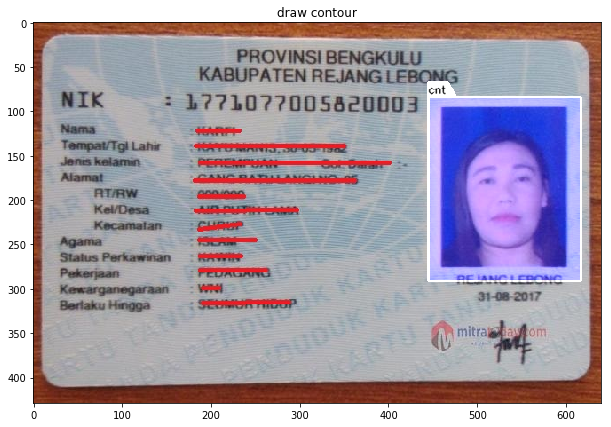

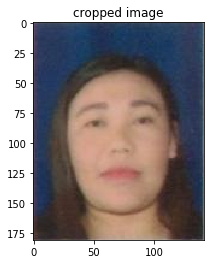

In [27]:
# EXAMPLE 9 : KTP | find contour filter by aspect ratio & extent and Crop / draw_ped()

img = cv2.imread('ktp1.jpg')
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to binary image
# apply threshold binary + Otsu's (since the background is more bright compare to the photo area )
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# find contour using RETR_CCOMP method to get two level hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# save cropped contour in this list
croped_imgs = []
img_copy = img.copy() 

# draw contour
for cnt, h in zip(contours, hierarchy[0]):
    # filter contour when hierarchy with no parent (boundary doesn't have parent).
    # and there shoulde next or prev contour, 
    # text in license plate should be in same hierarchy level as boundary contour
    if (h[0] != -1 or h[1] != -1) and h[3] == -1 :                           
        # find contour Area & boungin Rect
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)

        # calculate aspectRatio & extent
        aspectRatio = float(w)/h 
        rect_area = w*h
        extent = float(area)/rect_area
        
        # filter contour with aspect ratio less than 1 and more than 0.1 
        # and extent greater than 0.4 (rejecting long contour with small filled area)
        # area more than 200 pixel (rejecting small contour)
        if aspectRatio < 1 and aspectRatio > 0.1 and extent > 0.4 and area > 200:
            # draw_ped(img, label, x0, y0, xt, yt, ....)
            img = draw_ped(img, "cnt", x, y, x+w, y+h, 
                            font_size=0.4, alpha=0.5, bg_color=(255,0,0), ouline_color=(255,255,255), text_color=(0,0,0))

            # crop and append to this list
            croped_imgs.append(img_copy[y:y+h, x:x+w])
# show Image
plt.figure(figsize=(20,7))
plt.imshow(img[:,:,::-1])
plt.title("draw contour")
plt.show()

# show Image cropped
for img in croped_imgs :
    plt.imshow(img[:,:,::-1])
    plt.title("cropped image")
    plt.show()

## 2.4 Contour Detection from Binary Range Thresholding & Edge Image

In [28]:
# define range of blue color in HSV
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

# define range of red color in HSV
lower_red = np.array([-15, 50, 25])
upper_red = np.array([15, 255, 255])

# define range of green color in HSV
lower_green = np.array([35, 50, 25])
upper_green = np.array([70, 255, 255])

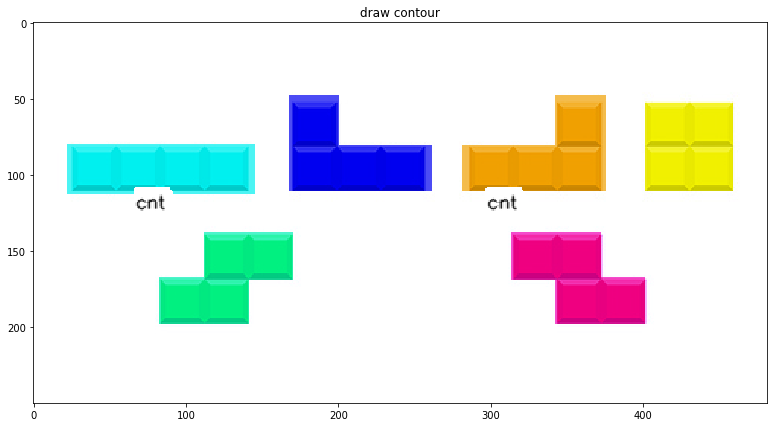

In [30]:
# EXAMPLE 10 : Find Contour from binary image Range Thresholding (color base)

img = cv2.imread('blocks.jpg')

# convert to hsv image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# convert to binary image by Range Thresholding (detect red & green)
mask_red = cv2.inRange(hsv.copy(), lower_red, upper_red)
mask_green = cv2.inRange(hsv.copy(), lower_green, upper_green)

mask = mask_red + mask_green

# apply thresholding result to bitwise and as mask
res = cv2.bitwise_and(img, img, mask= mask)

# find edge image
edged = cv2.Canny(mask, 150, 200)

# find contour using RETR_CCOMP method to get two level hierarchy
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# save cropped contour in this list
croped_imgs = []
img_copy = img.copy() 

# draw contour
for cnt, h in zip(contours, hierarchy[0]):
    # filter contour when hierarchy with no parent (boundary doesn't have parent).
    # and there shoulde next or prev contour, 
    # text in license plate should be in same hierarchy level as boundary contour
    if (h[0] != -1 or h[1] != -1) and h[3] == -1 :                           
        # find contour Area & boungin Rect
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)

        # calculate aspectRatio & extent
        aspectRatio = float(w)/h 
        rect_area = w*h
        extent = float(area)/rect_area
        
        # filter contour with aspect ratio less than 1 and more than 0.1 
        # and extent greater than 0.4 (rejecting long contour with small filled area)
        # area more than 200 pixel (rejecting small contour)
        if aspectRatio < 1.6 and aspectRatio > 1 and extent > 0.4 and area > 200:
            # draw_ped(img, label, x0, y0, xt, yt, ....)
            img = draw_ped(img, "cnt", x, y, x+w, y+h,
                            font_size=0.4, alpha=0.5, bg_color=(255,0,0), ouline_color=(255,255,255), text_color=(0,0,0))

            # crop and append to this list
            croped_imgs.append(img_copy[y:y+h, x:x+w])
# show Image
plt.figure(figsize=(20,7))
plt.imshow(img[:,:,::-1])
#plt.imshow(edged, cmap="gray")
plt.title("draw contour")
plt.show()

# # show Image cropped
for img in croped_imgs :
    plt.imshow(img[:,:,::-1])
    plt.title("cropped image")
    plt.show()

___
## 2.3 Contour Additional Function
- **Find 4 vertices Rorared Rectangle**
    - Finds the 4 vertices of a rotated rect. Useful to draw the rotated rectangle.
    - method : `cv2.boxPoints(box)` :
    - where :
        - `box` : The input rotated rectangle. It may be the output of `cv2.minAreaRect(cnt)`<br><br>
- **Convexity Defects**
    - Any deviation of the object from this hull can be considered as convexity defect.
        `hull = cv2.convexHull(cnt,returnPoints = False)`
        `defects = cv2.convexityDefects(cnt,hull)`
    - Remember we have to pass `returnPoints = False` while finding convex hull, in order to find convexity defects.
    - It returns an array where each row contains these values `[ start point, end point, farthest point, approximate distance to farthest point ]`.<br><br>
- **Point Polygon Test**
    - This function finds the **shortest distance** between a **point in the image** and a **contour**. 
    - It **returns the distance** which is negative when point is outside the contour, positive when point is inside and zero if point is on the contour.
    - `dist = cv2.pointPolygonTest(cnt, (50,50), measureDist=True)`
    - In the function, third argument is `measureDist`. 
    - If it is True, it finds the signed distance. 
    - If False, it finds whether the point is inside or outside or on the contour (it returns +1, -1, 0 respectively).<br><br>
- **Match Shapes**
    - Match Shapes enables us to compare **two shapes**, or **two contours** and returns a **metric showing the similarity**. 
    - The **lower the result**, the **better match** it is. <br>
    - `cv2.matchShapes(contour1, contour2, method, parameter)`
    - `contour1` : First contour or grayscale image, 
    - `contour2`: Second contour or grayscale image, 
    - `method` : Comparison method, 
        - `cv2.CONTOURS_MATCH_I1`
        - `cv2.CONTOURS_MATCH_I2`
        - `cv2.CONTOURS_MATCH_I3`
    - `parameter` : Method-specific parameter (not supported now).

___
___
# Source
- https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html
- https://docs.opencv.org/4.5.2/d1/d32/tutorial_py_contour_properties.html
- https://docs.opencv.org/4.5.2/dd/d49/tutorial_py_contour_features.html
- https://docs.opencv.org/4.5.2/d9/d8b/tutorial_py_contours_hierarchy.html
- https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html